The Weighted dcf function doesn't seem to work. Here I'm going to try and find out why.

In [1]:
%load_ext autoreload
%autoreload 1
%aimport WASP_lc
import pickle
import matplotlib.pyplot as plt
%pylab inline
t = WASP_lc


with open('udcf_bin/s3.p') as data:
    p = pickle.load(data)
    udcf_1 = p['udcf']
    udcf_err_1 = p['udcf_err']
    dt_1 = p['dt']

Populating the interactive namespace from numpy and matplotlib


/home/astro/phrmat/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:784: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/astro/phrmat/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


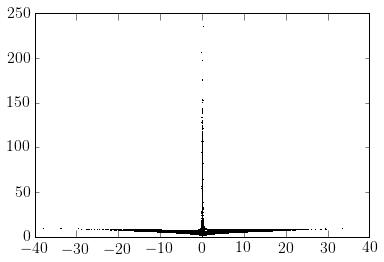

In [4]:
plt.plot(udcf_1,udcf_err_1,'k,')
show()

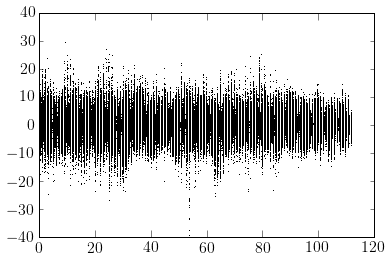

In [5]:
plt.plot(dt_1,udcf_1,'k,')
show()

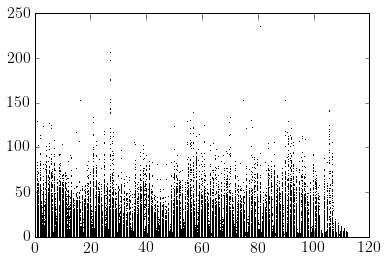

In [6]:
plt.plot(dt_1,udcf_err_1,'k,')
show()

In [2]:
dcf_1, dcf_err_1, tau_1 = WASP_lc.DCF(udcf_1,udcf_err_1,dt_1,50)

/home/astro/phrmat/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:784: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/astro/phrmat/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


NameError: name 'udcf_1' is not defined

In [4]:
udcf_1, udcf_err_1, utau_1 = WASP_lc.unweighted_DCF(udcf_1,udcf_err_1,dt_1,50)

Populating the interactive namespace from numpy and matplotlib


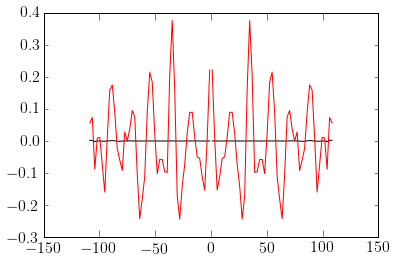

In [12]:
plt.plot(tau_1,dcf_1,'k')
plt.plot(0-tau_1,dcf_1,'k')

plt.plot(utau_1,udcf_1,'r')
plt.plot(0-utau_1,udcf_1,'r')

plt.show()

The weighting makes it a factor of 100 smaller! something must have gone wrong.

Figured it out - my error estimation is wrong because the fractional errors I've been using to weight the udcf are wrong... oops. We need the actual magnitude of the star from somewhere - that is in the headers too. need to modify the load script.

In [4]:
fname = '1SWASPJ231358.76+084540.6_WASP52B_100_ORKP_TAMTFA.lc'
wasp_dict = t.load_lc('lightcurves/'+fname)


In [6]:
print wasp_dict['MeanSWmag']

   12.3260


So this is the mean magnitude and should be added to all values before computation now. let's see how that plays out.

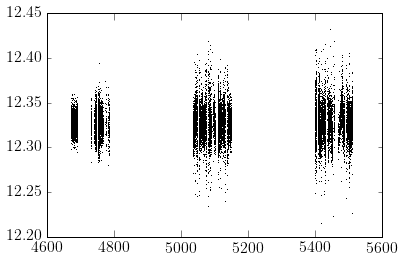

In [3]:
fname = '1SWASPJ231358.76+084540.6_WASP52B_100_ORKP_TAMTFA.lc'
wasp_dict = t.load_lc('lightcurves/'+fname)

plt.plot(wasp_dict['HJD'],wasp_dict['mag'],'k,')
plt.show()

Maybe that will do the trick...

In [ ]:
%load_ext autoreload
%autoreload 1
%aimport WASP_lc
import pickle
import matplotlib.pyplot as plt
%pylab inline
t = WASP_lc


fname = '1SWASPJ231358.76+084540.6_WASP52B_100_ORKP_TAMTFA.lc'
wasp_dict = t.load_lc('lightcurves/'+fname)

s1 = wasp_dict['HJD'] < 4900
HJD_s1 = wasp_dict['HJD'][s1]
mag_s1 = wasp_dict['mag'][s1]
err_s1 = wasp_dict['err'][s1]
HJD_s1, mag_s1, err_s1 = t.sum_duplicates(HJD_s1,mag_s1,err_s1)

nproc = 16

udcf_1, udcf_err_1, dt_1 = t.aUDCF(mag_s1,err_s1,HJD_s1,nproc)
pickle.dump({'udcf':udcf_1,'dt':dt_1,'udcf_err':udcf_err_1},open('udcf_bin/s1.p','w'))

dcf_1, dcf_err_1, tau_1 = t.DCF(udcf_1,udcf_err_1,dt_1,50)
udcf_1, udcf_err_1, utau_1 = t.unweighted_DCF(udcf_1,udcf_err_1,dt_1,50)

plt.plot(tau_1,dcf_1,'k')
plt.plot(0-tau_1,dcf_1,'k')

plt.plot(utau_1,udcf_1,'r')
plt.plot(0-utau_1,udcf_1,'r')

plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


In [1]:
%load_ext autoreload
%autoreload 1
%aimport WASP_lc
import pickle
import matplotlib.pyplot as plt
%pylab inline
t = WASP_lc


fname = '1SWASPJ231358.76+084540.6_WASP52B_100_ORKP_TAMTFA.lc'
wasp_dict = t.load_lc('lightcurves/'+fname)

s1 = wasp_dict['HJD'] < 4900
HJD_s1 = wasp_dict['HJD'][s1]
mag_s1 = wasp_dict['mag'][s1]
err_s1 = wasp_dict['err'][s1]
HJD_s1, mag_s1, err_s1 = t.sum_duplicates(HJD_s1,mag_s1,err_s1)

nproc = 16

Populating the interactive namespace from numpy and matplotlib


/home/astro/phrmat/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:784: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/astro/phrmat/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


In [2]:
udcf_1, udcf_err_1, dt_1 = t.aUDCF(mag_s1,err_s1,HJD_s1,nproc)

print udcf_1

[-0.0930559   0.01210522 -0.01478858 ...,  0.56685021  0.04455411
 -0.31204756]


In [3]:
udcf_2, udcf_err_2, dt_2 = t.aUDCF(mag_s1-12.3260,err_s1,HJD_s1,nproc)
print udcf_2

[-0.0930559   0.01210522 -0.01478858 ...,  0.56685021  0.04455411
 -0.31204756]


In [3]:
pickle.dump({'udcf':udcf_1,'dt':dt_1,'udcf_err':udcf_err_1},open('udcf_bin/s1_new_norm.p','w'))

In [25]:
pickle.dump({'udcf':udcf_2,'dt':dt_2,'udcf_err':udcf_err_2},open('udcf_bin/s1_non-normalised.p','w'))

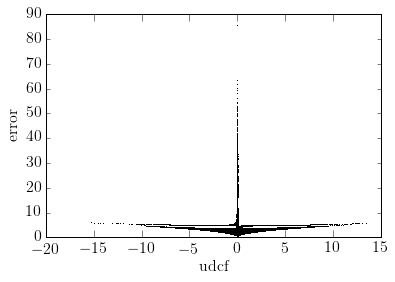

In [14]:
plt.plot(udcf_2,udcf_err_2,'k,')
plt.xlabel('udcf')
plt.ylabel('error')
plt.show()

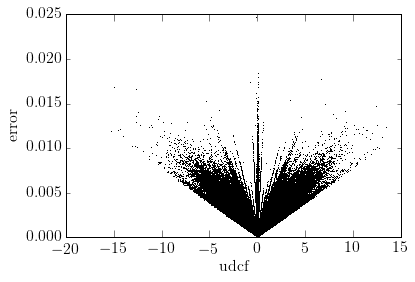

In [13]:
plt.plot(udcf_1,udcf_err_1,'k,')
plt.xlabel('udcf')
plt.ylabel('error')
plt.show()

That is a fucking cool plot!

# Attempt 2

In [4]:
%load_ext autoreload
%autoreload 1
%aimport WASP_lc
import pickle
import matplotlib.pyplot as plt
%pylab inline
t = WASP_lc


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


In [6]:
with open('udcf_bin/s1_new_norm.p') as data:
    p = pickle.load(data)
    udcf_1 = p['udcf']
    udcf_err_1 = p['udcf_err']
    dt_1 = p['dt']

In [3]:
with open('udcf_bin/s1_non-normalised.p') as data:
    p = pickle.load(data)
    udcf_2 = p['udcf']
    udcf_err_2 = p['udcf_err']
    dt_2 = p['dt']

In [ ]:
print max(udcf_1)

In [7]:
dcf_1, dcf_err_1, tau_1 = t.DCF(udcf_1,udcf_err_1,dt_1,50)

In [8]:
unweighted_dcf_1, unweighted_dcf_err_1, unweighted_tau_1 = t.unweighted_DCF(udcf_1,udcf_err_1,dt_1,50)

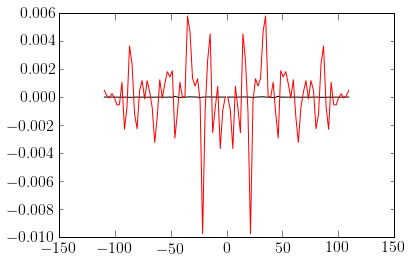

In [9]:
plt.plot(tau_1,dcf_1,'k')
plt.plot(0-tau_1,dcf_1,'k')

plt.plot(unweighted_tau_1,unweighted_dcf_1,'r')
plt.plot(0-unweighted_tau_1,unweighted_dcf_1,'r')

plt.show()

# WORK OUT PROPERLY WHAT THE ERROR ON UDCF IS OR THERE'S NO POINT DOING A WEIGHTED COMBINE

$$UDCF_{ij} = \frac{(a_i -\bar{a})(b_j -\bar{b})}{\sqrt{(\sigma_a^2 - e_a^2)(\sigma_b^2 - e_b^2)}}$$

is the formula for UDCF

$$\sigma_x^2 = \left(\frac{\delta x}{\delta a}\right)^2 \sigma_a^2 + \left(\frac{\delta x}{\delta b}\right)^2 \sigma_b^2$$

Is the error propogation formula

Therefore

$$\sigma_{UDCF} = \sqrt{\frac{(b_j - \bar{b})^2 e_a^2 + (a_i - \bar{a})^2 e_b^2}{(\sigma_a^2 - e_a^2)(\sigma_b^2 - e_b^2)}}$$


$$\sigma_{UDCF} = UDCF_{ij} \frac{\sqrt{(b - \bar{b})^2 e_a^2 + (a - \bar{a})^2 e_b^2}}{(a_i -\bar{a})(b_i -\bar{b})}$$

just want to do some quick tests to see what it's doing...

This is with with 'correct' normalisation function

Populating the interactive namespace from numpy and matplotlib


/home/astro/phrmat/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:784: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/astro/phrmat/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


12.345888 12.345888 0.024723 0.024723 0.00907260956065 0.00907260956065 values
0.48211231363 1.05559554413 0.00136534391095 errors
12.323249 12.323249 0.02325 0.02325 0.00907260956065 0.00907260956065 values
0.0970959330644 0.47861589415 0.000259067999059 errors
12.323423 12.323423 0.023862 0.023862 0.00907260956065 0.00907260956065 values
0.0866448435067 0.450082164269 0.000237264741457 errors
12.329281 12.329281 0.023804 0.023804 0.00907260956065 0.00907260956065 values
0.000841501689934 0.044373844135 2.29764104621e-06 errors
12.313057 12.313057 0.023086 0.023086 0.00907260956065 0.00907260956065 values
0.630954858652 1.22163816213 0.00167300056721 errors
12.330167 12.330167 0.023764 0.023764 0.00907260956065 0.00907260956065 values
0.000127080838261 0.0172490019817 3.46374294093e-07 errors
12.325064 12.325064 0.023395 0.023395 0.00907260956065 0.00907260956065 values
0.0506972269112 0.345459577766 0.000136092147991 errors
12.342025 12.342025 0.023168 0.023168 0.00907260956065 0.009

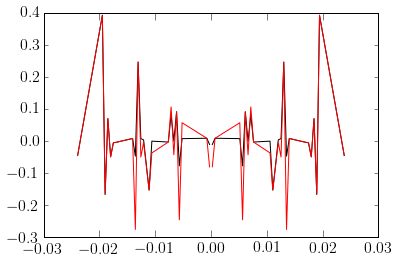

In [1]:
%load_ext autoreload
%autoreload 1
%aimport WASP_lc
import pickle
import matplotlib.pyplot as plt
%pylab inline
t = WASP_lc


fname = '1SWASPJ231358.76+084540.6_WASP52B_100_ORKP_TAMTFA.lc'
wasp_dict = t.load_lc('lightcurves/'+fname)

s1 = wasp_dict['HJD'] < 4900
HJD_s1 = wasp_dict['HJD'][s1]
mag_s1 = wasp_dict['mag'][s1]
err_s1 = wasp_dict['err'][s1]
HJD_s1, mag_s1, err_s1 = t.sum_duplicates(HJD_s1,mag_s1,err_s1)

nproc = 1

udcf_1, udcf_err_1, dt_1 = t.aUDCF(mag_s1[:10],err_s1[:10],HJD_s1[:10],nproc)
pickle.dump({'udcf':udcf_1,'dt':dt_1,'udcf_err':udcf_err_1},open('udcf_bin/s1_small.p','w'))

dcf_1, dcf_err_1, tau_1 = t.DCF(udcf_1,udcf_err_1,dt_1,50)
udcf_1, udcf_err_1, utau_1 = t.unweighted_DCF(udcf_1,udcf_err_1,dt_1,50)

plt.plot(tau_1,dcf_1,'k')
plt.plot(0-tau_1,dcf_1,'k')

plt.plot(utau_1,udcf_1,'r')
plt.plot(0-utau_1,udcf_1,'r')

plt.show()

This is with the simple one

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib
12.345888 12.345888 0.024723 0.024723 0.00907260956065 0.00907260956065 values
3.09791317579 6.78294922579 0.00877330192911 errors
12.323249 12.323249 0.02325 0.02325 0.00907260956065 0.00907260956065 values
0.540554282912 2.66455930014 0.00144228817868 errors
12.323423 12.323423 0.023862 0.023862 0.00907260956065 0.00907260956065 values
0.512720960893 2.66336172362 0.00140401437988 errors
12.329281 12.329281 0.023804 0.023804 0.00907260956065 0.00907260956065 values
0.00495132363071 0.261091885707 1.35191224724e-05 errors
12.313057 12.313057 0.023086 0.023086 0.00907260956065 0.00907260956065 values
3.4544135734 6.68834448483 0.00915950767067 errors
12.330167 12.330167 0.023764 0.023764 0.00907260956065 0.00907260956065 values
0.000744795146408 0.101092919532 2.03002983463e-06 errors
12.325064 12.325064 0.023395 0.023395 0.0090726095606

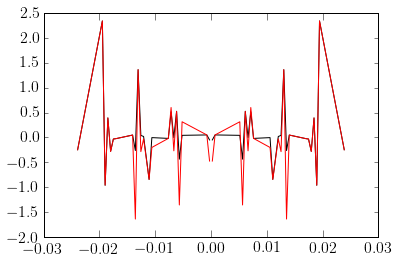

In [2]:
%load_ext autoreload
%autoreload 1
%aimport WASP_lc
import pickle
import matplotlib.pyplot as plt
%pylab inline
t = WASP_lc


fname = '1SWASPJ231358.76+084540.6_WASP52B_100_ORKP_TAMTFA.lc'
wasp_dict = t.load_lc('lightcurves/'+fname)

s1 = wasp_dict['HJD'] < 4900
HJD_s1 = wasp_dict['HJD'][s1]
mag_s1 = wasp_dict['mag'][s1]
err_s1 = wasp_dict['err'][s1]
HJD_s1, mag_s1, err_s1 = t.sum_duplicates(HJD_s1,mag_s1,err_s1)

nproc = 1

udcf_1, udcf_err_1, dt_1 = t.aUDCF(mag_s1[:10],err_s1[:10],HJD_s1[:10],nproc)
pickle.dump({'udcf':udcf_1,'dt':dt_1,'udcf_err':udcf_err_1},open('udcf_bin/s1_small.p','w'))

dcf_1, dcf_err_1, tau_1 = t.DCF(udcf_1,udcf_err_1,dt_1,50)
udcf_1, udcf_err_1, utau_1 = t.unweighted_DCF(udcf_1,udcf_err_1,dt_1,50)

plt.plot(tau_1,dcf_1,'k')
plt.plot(0-tau_1,dcf_1,'k')

plt.plot(utau_1,udcf_1,'r')
plt.plot(0-utau_1,udcf_1,'r')

plt.show()

I think the conceptual error I'm making is that 'measurement error' in the equation is defined as the average measurement error. The point is for the deviation due to actual variability to be all that's left. Let's try that.

Populating the interactive namespace from numpy and matplotlib


/home/astro/phrmat/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:784: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/astro/phrmat/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/astro/phrmat/Python/TML/WASP_lc/autocorrelation.py:85: RuntimeWarning: invalid value encountered in sqrt
  norm = np.sqrt((sig_a**2 - a_e**2)*(sig_b**2 - b_e**2))
/home/astro/phrmat/Python/TML/WASP_lc/autocorrelation.py:85: RuntimeWarning: invalid value encountered in sqrt
  norm = np.sqrt((sig_a**2 - a_e**2)*(sig_b**2 - b_e**2))
/home/astro/phrmat/Python/TML/WASP_lc/autocorrelation.py:85: RuntimeWarning: invalid value encountered in sqrt
  norm = np.sqrt((sig_a**2 - a_e**2)*(sig_b**2 - b_e**2))
/home/astro/phrmat/Python/TML/WASP_lc/autoc

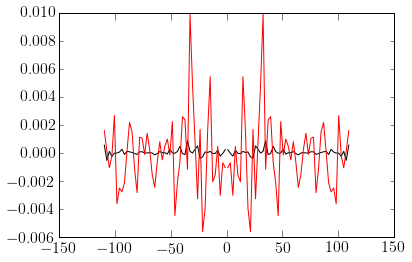

In [1]:
%load_ext autoreload
%autoreload 1
%aimport WASP_lc
import pickle
import matplotlib.pyplot as plt
%pylab inline
t = WASP_lc


fname = '1SWASPJ231358.76+084540.6_WASP52B_100_ORKP_TAMTFA.lc'
wasp_dict = t.load_lc('lightcurves/'+fname)

s1 = wasp_dict['HJD'] < 4900
HJD_s1 = wasp_dict['HJD'][s1]
mag_s1 = wasp_dict['mag'][s1]
err_s1 = wasp_dict['err'][s1]
HJD_s1, mag_s1, err_s1 = t.sum_duplicates(HJD_s1,mag_s1,err_s1)

nproc = 16

udcf_1, udcf_err_1, dt_1 = t.aUDCF(mag_s1,err_s1,HJD_s1,nproc)
pickle.dump({'udcf':udcf_1,'dt':dt_1,'udcf_err':udcf_err_1},open('udcf_bin/s1_small.p','w'))

dcf_1, dcf_err_1, tau_1 = t.DCF(udcf_1,udcf_err_1,dt_1,50)
un_dcf_1, un_dcf_err_1, un_tau_1 = t.unweighted_DCF(udcf_1,udcf_err_1,dt_1,50)

plt.plot(tau_1,dcf_1,'k')
plt.plot(0-tau_1,dcf_1,'k')

plt.plot(un_tau_1,un_dcf_1,'r')
plt.plot(0-un_tau_1,un_dcf_1,'r')

plt.show()

In [3]:
print mean(udcf_1[dt_1 == 0]), mean(udcf_1[dt_1 == 0])/np.sqrt(len(udcf_1[dt_1 == 0]))

1.0521047609 0.0192860159857


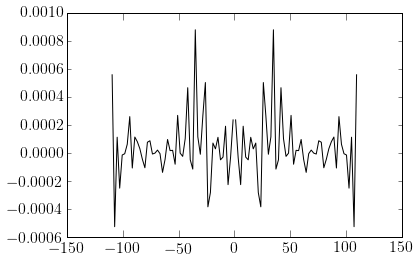

In [4]:
dcf_1, dcf_err_1, tau_1 = t.DCF(udcf_1,udcf_err_1,dt_1,100)
plt.plot(tau_1,dcf_1,'k')
plt.plot(0-tau_1,dcf_1,'k')

plt.show()

In [8]:
from WASP_lc import *
weighted_mean(udcf_1[dt_1 == 0],udcf_err_1[dt_1 == 0])

(0.00066250167932793778, 0.00066977126650782101)

In [9]:
mean(udcf_1[dt_1 == 0])

1.0521047608982532

arrggh, this is so frustrating! so the expected value of 0 has to be 1 (from normalisation concerns) we get that when we're unweighted, but not when we're weighted. Why? is there something wrong with my weighted mean code?

In [10]:
from WASP_lc import *
weighted_mean([1.0,-1.0,-1.0],[1.0,1.0,1.0])

(-0.3333333333333333, 0.57735026918962573)

In [11]:
weighted_mean([1.0,1.0,-1.0],[1.0,1.0,1.0])

(0.3333333333333333, 0.57735026918962573)

In [12]:
weighted_mean([1.0,1.0,-1.0],[1.0,-1.0,1.0])

(0.3333333333333333, 0.57735026918962573)

nope, I'm pretty sure my weighted mean code is right. what then?

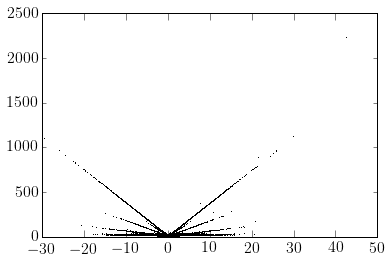

In [15]:
plt.plot(udcf_1,udcf_err_1,'k,')
show()

There's clearly something wrong here... I don't think the error should be climbing as the square of the value...

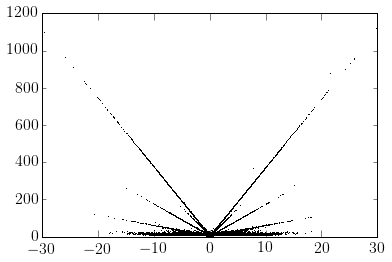

In [17]:
plt.plot(udcf_1[dt_1 != 0.0],udcf_err_1[dt_1 != 0.0],'k,')


show()

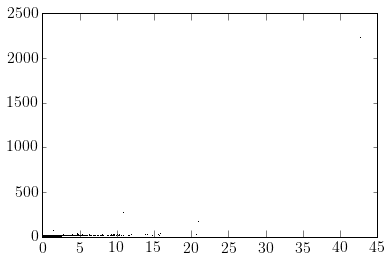

In [18]:
plt.plot(udcf_1[dt_1 == 0.0],udcf_err_1[dt_1 == 0.0],'k,')
show()

In [22]:
print min(udcf_1[dt_1 != 0.0]), min(udcf_1[dt_1 == 0.0]) 

-29.6646914091 8.60899557356e-07


expected errors are 1.07*M^0.5 / (M -1) where m is the number in the bin. 

In [24]:
print len(udcf_1)/100

44297


In [27]:
nbins = 100
M = len(udcf_1)/nbins
1.07*M**0.5 / (M -1)

0.00508401033299064

In [54]:
un_dcf_1, un_dcf_err_1, un_tau_1 = t.unweighted_DCF(udcf_1,udcf_err_1,dt_1,50)

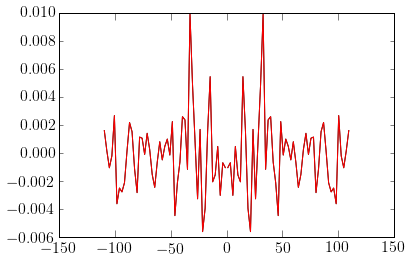

In [55]:
plt.plot(un_tau_1,un_dcf_1,'k')
plt.plot(0-un_tau_1,un_dcf_1,'k')

plt.plot(un_tau_1,un_dcf_err_1,'r')
plt.plot(0-un_tau_1,un_dcf_err_1,'r')

plt.show()

Maybe this was right all along and I was using bins that were too large to see the structure?

In [35]:
print un_tau_1[argsort(un_dcf_1)][-10:]

[  85.47104759  109.85908759   17.27486167   94.05202463   27.21072981
   42.56616241   78.47077685   65.14768092   30.59795759   77.11588574]


One last thing to consider is - how much does weighted/unweighted matter? Really should have checked this first but so bloody stubborn... make a histogram of errors in the data

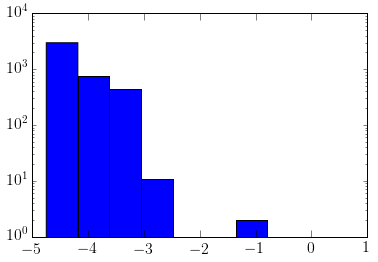

In [49]:
hist(log(wasp_dict['err'][s1]),bins=10)
yscale('log')
show()

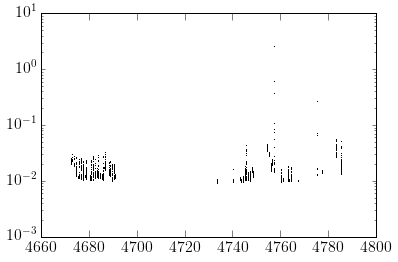

In [50]:
plot(wasp_dict['HJD'][s1],wasp_dict['err'][s1],'k,')
yscale('log')

I think this demonstrates why in this dataset it is necessary to weight data points - there's a decent subset with errors 10x or 100x higher, I can't imagine that being fair to include them normally.